In [34]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols


# Exploring the Data


In [35]:
# Import the data set.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [36]:
#Checking Datatypes
reviews.dtypes

gender                     object
age                         int64
remuneration (k£)         float64
spending_score (1-100)      int64
loyalty_points              int64
education                  object
language                   object
platform                   object
product                     int64
review                     object
summary                    object
dtype: object

In [37]:
#Checking metadata
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [38]:
#Checking for missing values
reviews.isnull()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False,False,False,False,False
1997,False,False,False,False,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False,False,False,False,False


#### Comment

There are no missing values in this dataframe.

In [39]:
#Creating summary statistics
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


In [40]:
#Dropping unecessary columns
reviews_df = reviews.drop(columns=['language', 'platform'])

reviews_df

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


In [41]:
#Changing  column names
reviews_df = reviews_df.rename({'remuneration (k£)': 'renumeration', 'spending_score (1-100)': 'spendingscore'}, axis='columns')
reviews_df.head()

,gender,age,renumeration,spendingscore,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [42]:
#Saving a copy as a CSV file
reviews_df.to_csv('reviews_new.csv', index=False)


In [43]:
#sense checking the clean csv file
reviews_df2 = pd.read_csv('reviews_new.csv')
# Printing first 2 rows of DataFrame.
reviews_df2.head(5)

,gender,age,renumeration,spendingscore,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


# 1) Loyalty Points vs Age

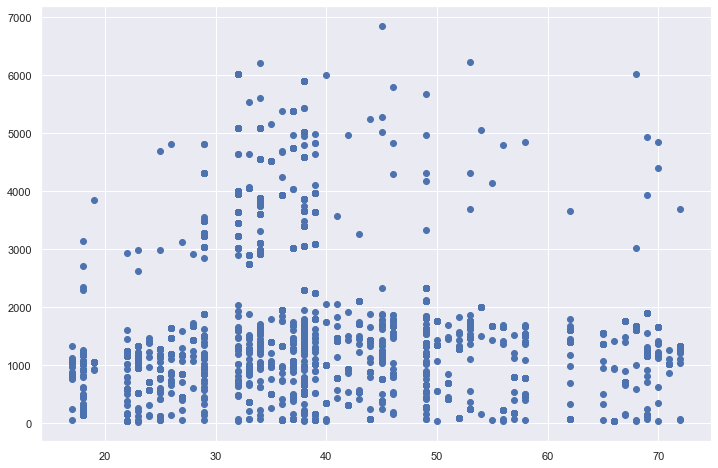

In [44]:
# Define the dependent variable.
y = reviews_df2['loyalty_points']
# Define the independent variable.
X = reviews_df2['age']

# Check for linearity.
plt.scatter(X,y)

In [45]:
# Run the OLS test.
f = 'y ~ X'
r = ols(f, data = reviews_df2).fit()

# View the output.
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Fri, 23 Dec 2022   Prob (F-statistic):             0.0577
Time:                        03:56:53   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
X             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

𝑅2 : 0.2% of the total variability of y (loyalty points), is explained by the variability of X (how old they are).
F-stat: If the probability of F stat. is smaller than a threshold (usually 0.05), the set of variables of the regression model are significant, else, the regression is not good. For simple regression model, the t-statistic is equivalent.
X: The coefficient of X describes the slope of the regression line, in other words, how much the response variable y change when X changes by 1 unit. In this activity, if the length that the customer has been a member (X) changes by 1 unit (please check units used) the money spent (y) will change by -4.0128 units.
The t-value tests the hypothesis that the slope is significant or not. If the corresponding probability is small (typically smaller than 0.05) the slope is significant. In this case, the probability of the t-value is 0.058, thus the estimated slope is insignificant.
The last two numbers describe the 95% confidence interval of the true xcoefficient, i.e. the true slope. For instance, if you take a different sample, the estimated slope will be slightly different. If you take 100 random samples each of 500 observations of X and y, then 95 out of the 100 samples will derive a slope that is within the interval (-8.157 , 0.131).
In case of a multivariate regression model, each explanatory variable will have a separate row with the above information. So we will need to check which of the variables are significant, remove the ones that are not significant and then re-run the new regression model.

In [46]:
# x coef: - 4.0128
# Constant coef: 1736.5177
# Create the linear equation.
y_pred = 1736.5177 - 4.0128 * X

# View the output.
y_pred

0       1664.2873
1       1644.2233
2       1648.2361
3       1636.1977
4       1604.0953
          ...    
1995    1588.0441
1996    1563.9673
1997    1600.0825
1998    1600.0825
1999    1608.1081
Name: age, Length: 2000, dtype: float64

Text(0, 0.5, 'Loyalty Points')

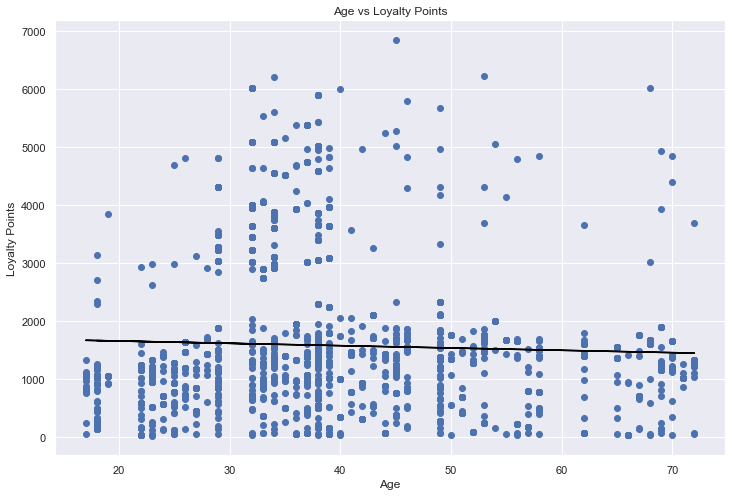

In [47]:
# Plot the data points.
plt.scatter(X, y)

# Plot the line.
plt.plot(X, y_pred, color='black')
plt.title("Age vs Loyalty Points")
plt.xlabel("Age")
plt.ylabel("Loyalty Points")

### Observations

There is no linear relationship between Loyalty Points and age. There is no clear correlation at all thus age cannot be used to predict loyalty points.

# 2) Loyalty Points vs Renumeration

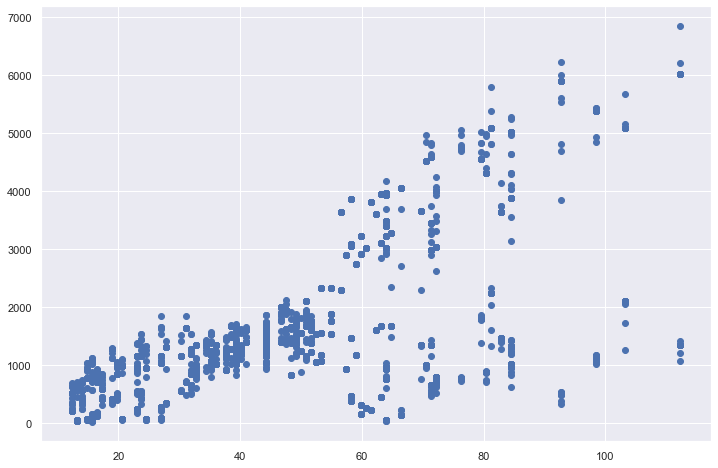

In [48]:
# Define the dependent variable.
y1 = reviews_df2['loyalty_points']
# Define the independent variable.
X1 = reviews_df2['renumeration']

# Check for linearity.
plt.scatter(X1,y1)

In [49]:
# Run the OLS test.
f = 'y1 ~ X1'
r = ols(f, data = reviews_df2).fit()

# View the output.
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Fri, 23 Dec 2022   Prob (F-statistic):          2.43e-209
Time:                        03:56:56   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
X1            34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

𝑅2 : 38% of the total variability of y (loyalty points), is explained by the variability of X (how old they are).
F-stat: If the probability of F stat. is smaller than a threshold (usually 0.05), the set of variables of the regression model are significant, else, the regression is not good. For simple regression model, the t-statistic is equivalent.
X: The coefficient of X describes the slope of the regression line, in other words, how much the response variable y change when X changes by 1 unit. In this activity, if the length that the customer has been a member (X) changes by 1 unit (please check units used) the money spent (y) will change by 34.1878 units.
The t-value tests the hypothesis that the slope is significant or not. If the corresponding probability is small (typically smaller than 0.05) the slope is significant. In this case, the probability of the t-value is 0.00, thus the estimated slope is significant.
The last two numbers describe the 95% confidence interval of the true xcoefficient, i.e. the true slope. For instance, if you take a different sample, the estimated slope will be slightly different. If you take 100 random samples each of 500 observations of X and y, then 95 out of the 100 samples will derive a slope that is within the interval (32.270, 36.106).
In case of a multivariate regression model, each explanatory variable will have a separate row with the above information. So we will need to check which of the variables are significant, remove the ones that are not significant and then re-run the new regression model.

In [50]:
# x1 coef: 34.1878
# Constant coef: -65.6865
# Create the linear equation.
y1_pred = -65.6865 + 34.1878 * X1

# View the output.
y1_pred

0        354.823440
1        354.823440
2        382.857436
3        382.857436
4        410.891432
           ...     
1995    2821.815088
1996    3102.155048
1997    3102.155048
1998    3298.393020
1999    3102.155048
Name: renumeration, Length: 2000, dtype: float64

Text(0, 0.5, 'Loyalty Points')

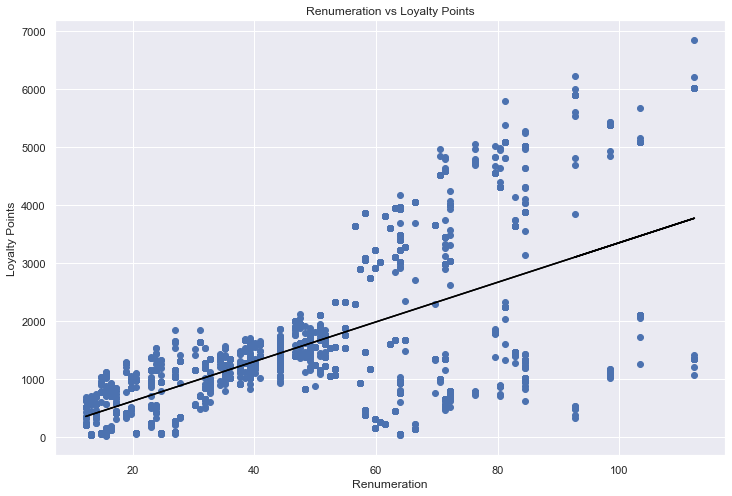

In [51]:
# Plot the data points.
plt.scatter(X1, y1)

# Plot the line.
plt.plot(X1, y1_pred, color='black')
plt.plot(X1, y1_pred, color='black')
plt.title("Renumeration vs Loyalty Points")
plt.xlabel("Renumeration")
plt.ylabel("Loyalty Points")


### Observation

There is clear positive correlation between renumeration and loyalty points. The model is a good fit and renumeration can be used to predict loyalty points.

# 3) Loyalty Points vs Spending Scores

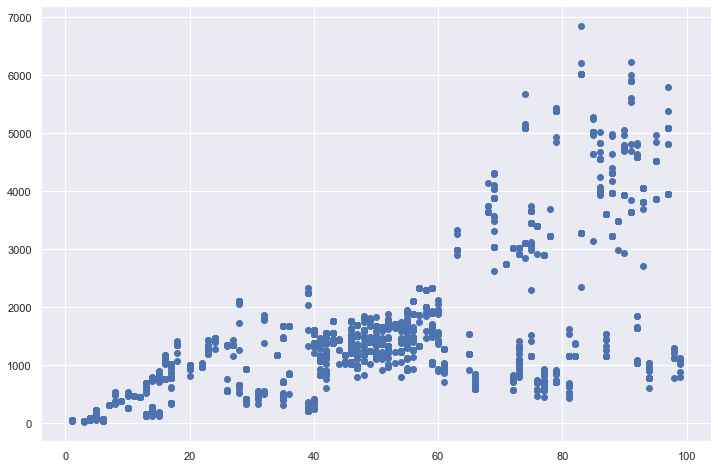

In [52]:
# Define the dependent variable.
y2 = reviews_df2['loyalty_points']
# Define the independent variable.
X2 = reviews_df2['spendingscore']

# Check for linearity.
plt.scatter(X2,y2)

In [53]:
# Run the OLS test.
f = 'y2 ~ X2'
r = ols(f, data = reviews_df2).fit()

# View the output.
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y2   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Fri, 23 Dec 2022   Prob (F-statistic):          2.92e-263
Time:                        03:56:58   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
X2            33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

𝑅2 : 45.2% of the total variability of y (loyalty points), is explained by the variability of X (how old they are).
F-stat: If the probability of F stat. is smaller than a threshold (usually 0.05), the set of variables of the regression model are significant, else, the regression is not good. For simple regression model, the t-statistic is equivalent.
X: The coefficient of X describes the slope of the regression line, in other words, how much the response variable y change when X changes by 1 unit. In this activity, if the length that the customer has been a member (X) changes by 1 unit (please check units used) the money spent (y) will change by 33.0617 units.
The t-value tests the hypothesis that the slope is significant or not. If the corresponding probability is small (typically smaller than 0.05) the slope is significant. In this case, the probability of the t-value is 0.00, thus the estimated slope is significant.
The last two numbers describe the 95% confidence interval of the true xcoefficient, i.e. the true slope. For instance, if you take a different sample, the estimated slope will be slightly different. If you take 100 random samples each of 500 observations of X and y, then 95 out of the 100 samples will derive a slope that is within the interval (31.464, 34.659).
In case of a multivariate regression model, each explanatory variable will have a separate row with the above information. So we will need to check which of the variables are significant, remove the ones that are not significant and then re-run the new regression model.

In [54]:
# x2 coef: 33.0617
# Constant coef: -75.0527
# Create the linear equation.
y2_pred = -75.0527 + 33.0617 * X2

# View the output.
y2_pred

0       1214.3536
1       2602.9450
2        123.3175
3       2470.6982
4       1247.4153
          ...    
1995    2206.2046
1996     189.4409
1997    2933.5620
1998     453.9345
1999     189.4409
Name: spendingscore, Length: 2000, dtype: float64

Text(0, 0.5, 'Loyalty Points')

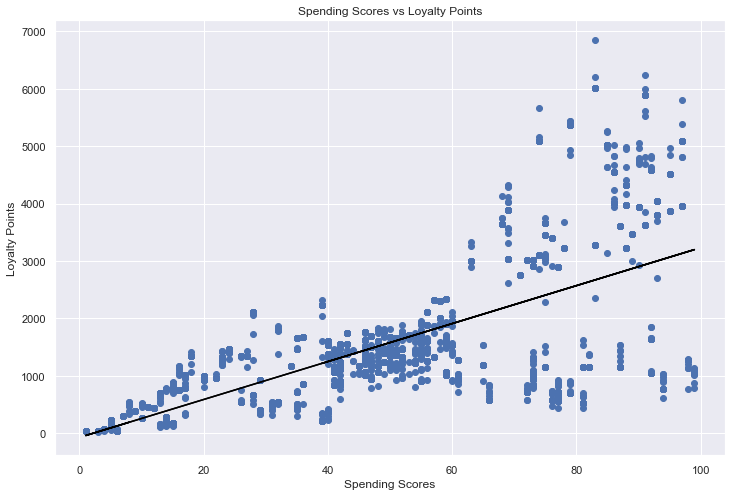

In [55]:
# Plot the data points.
plt.scatter(X2, y2)

# Plot the line.
plt.plot(X2, y2_pred, color='black')
plt.plot(X2, y2_pred, color='black')

plt.title("Spending Scores vs Loyalty Points")
plt.xlabel("Spending Scores")
plt.ylabel("Loyalty Points")

### Observations

There is clear positive correlation between spending scores and loyalty points. The model is a good fit and spending scores can be used to predict loyalty points.

# Make predictions with clustering using *k*-means

In [56]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [57]:
df2 = pd.read_csv('reviews_new.csv')
df2.head(5)

,gender,age,renumeration,spendingscore,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [58]:
#Creating a new dataframe.
df2 = df2.filter(['renumeration', 'spendingscore'], axis=1)
df2.head(5)

,renumeration,spendingscore
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40


In [59]:
#Exploring the dataset
df2.dtypes
df2.shape
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   renumeration   2000 non-null   float64
 1   spendingscore  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


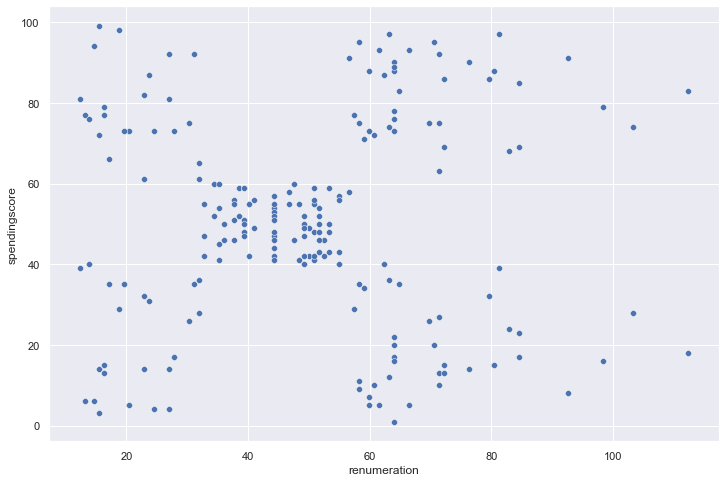

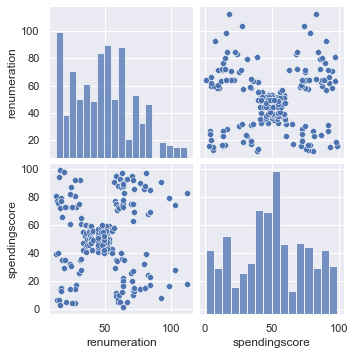

In [60]:
# Import Seaborn and Matplotlib.
from matplotlib import pyplot as plt
import seaborn as sns

# Create a scatterplot with Seaborn.
sns.scatterplot(x='renumeration',
                y='spendingscore',
                data=df2)


# Create a pairplot with Seaborn.
x = df2[['renumeration', 'spendingscore']]

sns.pairplot(df2)
        
             

## Elbow Method

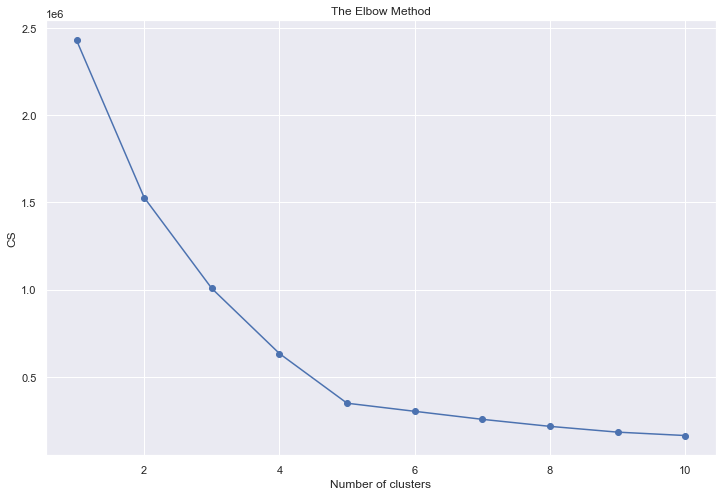

In [61]:
#Using the elbow method

# Import the KMeans class.
from sklearn.cluster import KMeans 

# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++', 
                    max_iter = 500,
                    n_init = 10,
                    random_state = 42)
    kmeans.fit(df2)
    ss.append(kmeans.inertia_)

plt.plot(range(1, 11),
         ss,
         marker='o')

plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("CS")

plt.show()

## Silhouette Method

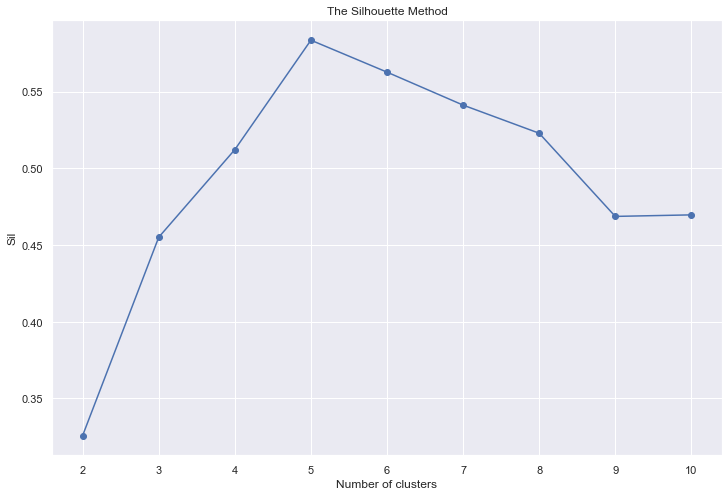

In [62]:
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(df2)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(df2,
                                labels,
                                metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

- We can observe that the “elbow” is the number 5 which is also optimal for the Silhouette method. Now we can run a K-Means using as n_clusters the number 5.
- I will be testing the optimal number of clusters using 3 values for k; k=4, k=5 and k=6.

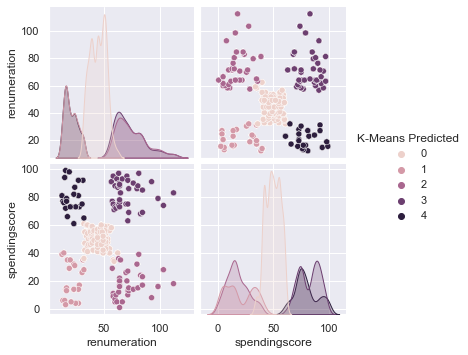

In [63]:
# Using k=5:
kmeans = KMeans(n_clusters = 5, max_iter = 15000, init='k-means++', random_state=0).fit(df2)
clusters = kmeans.labels_
df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2, hue='K-Means Predicted', diag_kind='kde')

In [64]:
# Check the number of observations per predicted class.
df2['K-Means Predicted'].value_counts()

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

In [65]:
# View the K-Means predicted.
print(df2.head())

   renumeration  spendingscore  K-Means Predicted
0         12.30             39                  1
1         12.30             81                  4
2         13.12              6                  1
3         13.12             77                  4
4         13.94             40                  1


<AxesSubplot:xlabel='renumeration', ylabel='spendingscore'>

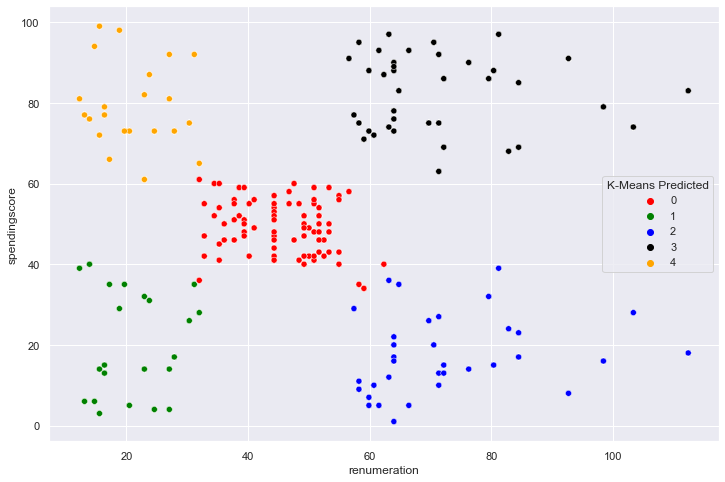

In [66]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='renumeration' , 
                y ='spendingscore',
                data=df2 , hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange'])

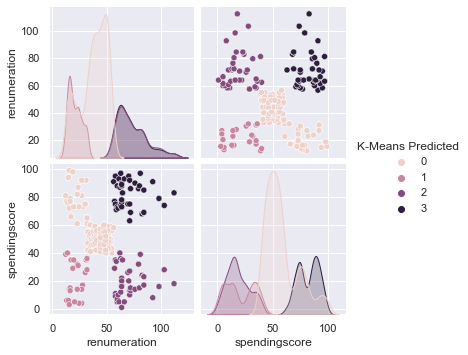

In [67]:
#Using 4 clusters
kmeans = KMeans(n_clusters = 4,
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(df2)

clusters = kmeans.labels_
df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [68]:
df2['K-Means Predicted'].value_counts()

0    1013
3     356
2     351
1     280
Name: K-Means Predicted, dtype: int64

In [69]:
# View the K-Means predicted.
print(df2.head())

   renumeration  spendingscore  K-Means Predicted
0         12.30             39                  1
1         12.30             81                  0
2         13.12              6                  1
3         13.12             77                  0
4         13.94             40                  1


<AxesSubplot:xlabel='renumeration', ylabel='spendingscore'>

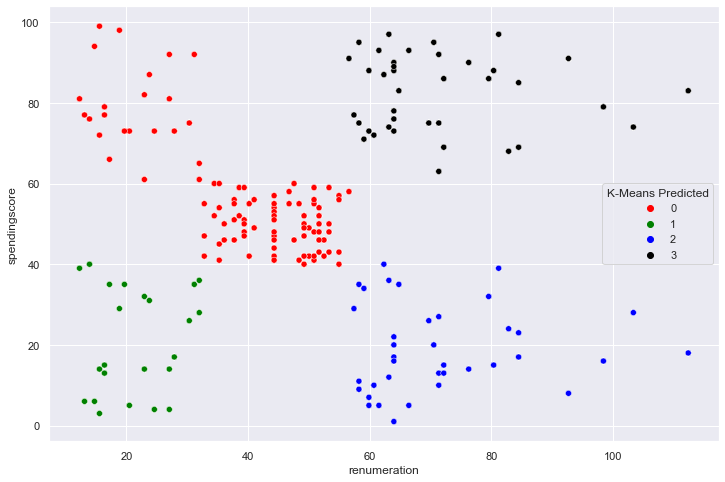

In [70]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='renumeration' , 
                y ='spendingscore',
                data=df2 , hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black'])

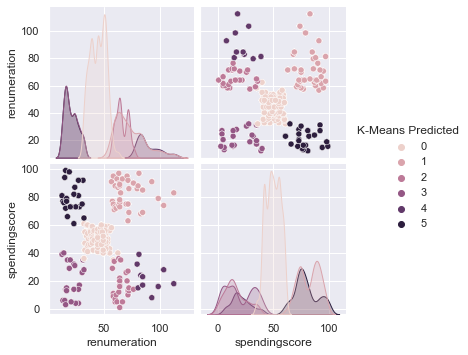

In [71]:
#Using 6 clusters
kmeans = KMeans(n_clusters = 6,
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(df2)

clusters = kmeans.labels_
df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [72]:
df2['K-Means Predicted'].value_counts()

0    767
1    356
3    271
5    269
2    214
4    123
Name: K-Means Predicted, dtype: int64

In [40]:
# View the K-Means predicted.
print(df2.head())

   renumeration  spendingscore  K-Means Predicted
0         12.30             39                  3
1         12.30             81                  5
2         13.12              6                  3
3         13.12             77                  5
4         13.94             40                  3


<AxesSubplot:xlabel='renumeration', ylabel='spendingscore'>

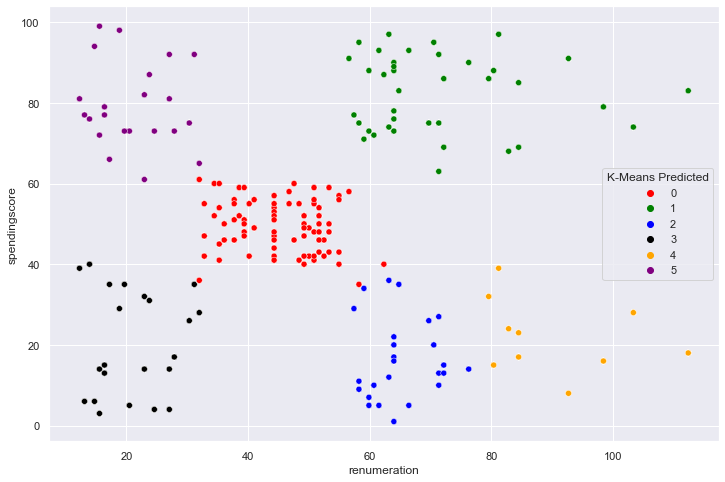

In [73]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='renumeration' , 
                y ='spendingscore',
                data=df2 , hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange', 'purple'])

### Observations

The optimal number of clusters is where k=5. The other two values for K would induce problems in the analysis.

# Analysing customer sentiments with reviews

In [79]:
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

#Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

df3 = pd.read_csv('reviews_new.csv')
df3.shape
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   renumeration    2000 non-null   float64
 3   spendingscore   2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


In [80]:
df3 = reviews.filter(['review', 'summary'], axis=1)
df3.head()
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   2000 non-null   object
 1   summary  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [81]:
#Double checking for missing values
df3.isnull().sum()

review     0
summary    0
dtype: int64

# Data preparation for NLP

In [82]:
#Change the data to lower case and join the elements in each column (review and summary).
df3['review'] = df3['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df3['summary'] = df3['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

df3

,review,summary
0,"when it comes to a dm's screen, the space on t...",the fact that 50% of this space is wasted on a...
1,an open letter to galeforce9*: your unpainted ...,another worthless dungeon master's screen from...
2,"nice art, nice printing. why two panels are fi...","pretty, but also pretty useless"
3,amazing buy! bought it as a gift for our new d...,five stars
4,as my review of gf9's previous screens these w...,money trap
...,...,...
1995,the perfect word game for mixed ages (with mom...,the perfect word game for mixed ages (with mom
1996,great game. did not think i would like it when...,super fun
1997,great game for all......... keeps the mind nim...,great game
1998,fun game!,four stars


In [84]:
#Removing punctuation
df3["review"] = df3['review'].str.replace('[^\w\s]','')
df3["summary"] = df3['summary'].str.replace('[^\w\s]','')


In [85]:
# Viewing review and summary columns.
print(df3['review'].head())
print(df3['summary'].head())

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object
0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object


In [86]:
# Dropping duplicates on the review and summary columns.
df4 = df3.drop_duplicates()

# Viewing the metadata of the DataFrame.
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1961 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   1961 non-null   object
 1   summary  1961 non-null   object
dtypes: object(2)
memory usage: 46.0+ KB


There were 39 duplicates in both columns.

# Tokenisation

In [87]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1961 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   1961 non-null   object
 1   summary  1961 non-null   object
dtypes: object(2)
memory usage: 46.0+ KB


In [88]:
# Creating a copy of df4 DataFrame.
df4_copy = df4

df4_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1961 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   1961 non-null   object
 1   summary  1961 non-null   object
dtypes: object(2)
memory usage: 46.0+ KB


In [89]:
# Applying tokenisation in review and summary columns.
df4_copy['tokens_review'] = df4_copy['review'].apply(word_tokenize)
df4_copy['tokens_summary'] = df4_copy['summary'].apply(word_tokenize)
df4_copy = df4_copy.reset_index()

# Viewing the first 5 rows.
df4_copy.head()

,index,review,summary,tokens_review,tokens_summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was..."
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,..."
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]"
3,3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]"
4,4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]"


# Creating WorldClouds

In [90]:
# Creating a word cloud for review column.
textt = " ".join(review for review in df4_copy.review)
wordcloud = WordCloud(width = 1600, height = 900,
                      background_color = 'white',
                      colormap = 'plasma',
                      stopwords = 'none',
                      min_font_size = 10).generate(textt)

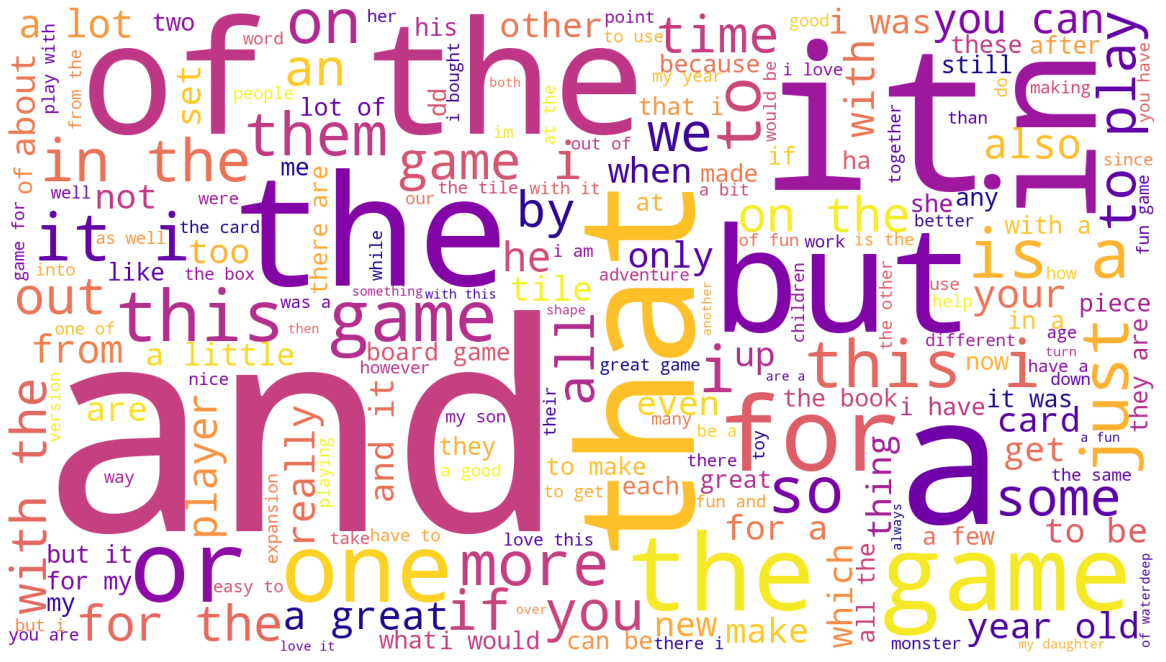

In [91]:
# Plotting the WordCloud image for the review column.
plt.figure(figsize = (16, 9), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

all_tokens = []
for i in range(df4_copy.shape[0]):
    all_tokens = all_tokens + df4_copy['tokens_review'][i]

In [92]:
# Creating a word cloud for the summary column.
textt = " ".join(review for review in df4_copy.summary)
wordcloud = WordCloud(width = 1600, height = 900,
                      background_color = 'white',
                      colormap = 'plasma',
                      stopwords = 'none',
                      min_font_size = 10).generate(textt)

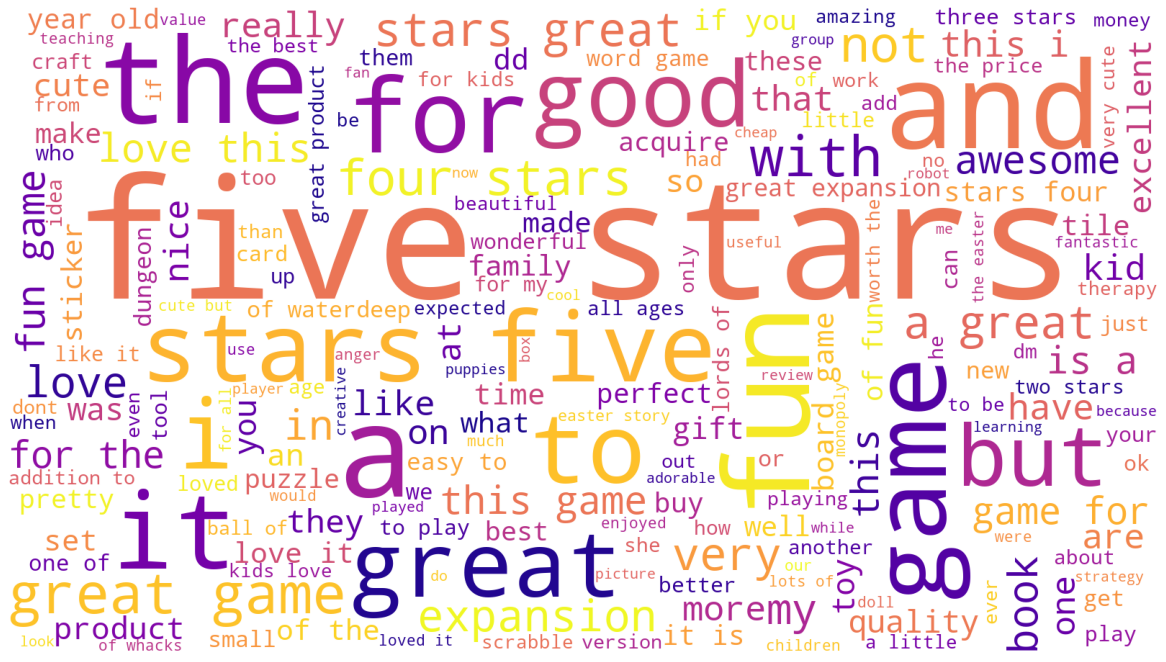

In [93]:
# Plotting the WordCloud image for the summary column.
plt.figure(figsize = (16, 9), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

all_tokens = []
for i in range(df4_copy.shape[0]):
    all_tokens = all_tokens + df4_copy['tokens_summary'][i]

## Determining Frequency Distribution and Polarity

In [94]:
all_tokens

['the',
 'fact',
 'that',
 '50',
 'of',
 'this',
 'space',
 'is',
 'wasted',
 'on',
 'art',
 'and',
 'not',
 'terribly',
 'informative',
 'or',
 'needed',
 'art',
 'another',
 'worthless',
 'dungeon',
 'masters',
 'screen',
 'from',
 'galeforce9',
 'pretty',
 'but',
 'also',
 'pretty',
 'useless',
 'five',
 'stars',
 'money',
 'trap',
 'five',
 'stars',
 'best',
 'gm',
 'screen',
 'ever',
 'five',
 'stars',
 'great',
 'but',
 'could',
 'be',
 'even',
 'better',
 'another',
 'missed',
 'opportunity',
 'not',
 'a',
 'value',
 'add',
 'to',
 'the',
 'product',
 'line',
 'five',
 'stars',
 'love',
 'the',
 'map',
 'not',
 'a',
 'general',
 'dm',
 'screen',
 'very',
 'weak',
 'game',
 'fell',
 'completely',
 'flat',
 'five',
 'stars',
 'good',
 'book',
 'buckley',
 'was',
 'a',
 'card',
 'mommer',
 'very',
 'advanced',
 'but',
 'as',
 'good',
 'as',
 'it',
 'gets',
 'you',
 'better',
 'know',
 'what',
 'youre',
 'getting',
 'into',
 'dont',
 'bother',
 'the',
 'worst',
 'value',
 'ive',
 'e

In [95]:
# Creating the frequency distribution.
fdist = FreqDist(all_tokens)
fdist

FreqDist({'stars': 427, 'five': 342, 'game': 319, 'great': 295, 'the': 261, 'a': 240, 'for': 232, 'fun': 218, 'to': 192, 'and': 168, ...})

In [96]:
# Removing alphanumeric characters.
tokens2 = [word for word in all_tokens if word.isalnum()]

In [97]:
# Removing all the stopwords.
english_stopwords = set(stopwords.words('english'))
tokens_2 = [x for x in tokens2 if x.lower() not in english_stopwords]
tokens_2_string = ''
for value in tokens_2:
    tokens_2_string = tokens_2_string + value + ' '

In [98]:
# Creating a WordCloud without stopwords.
wordcloud = WordCloud(width = 1600, height = 900,
                      background_color = 'white',
                      colormap = 'plasma',
                      stopwords = 'none',
                      min_font_size = 5).generate(tokens_2_string)

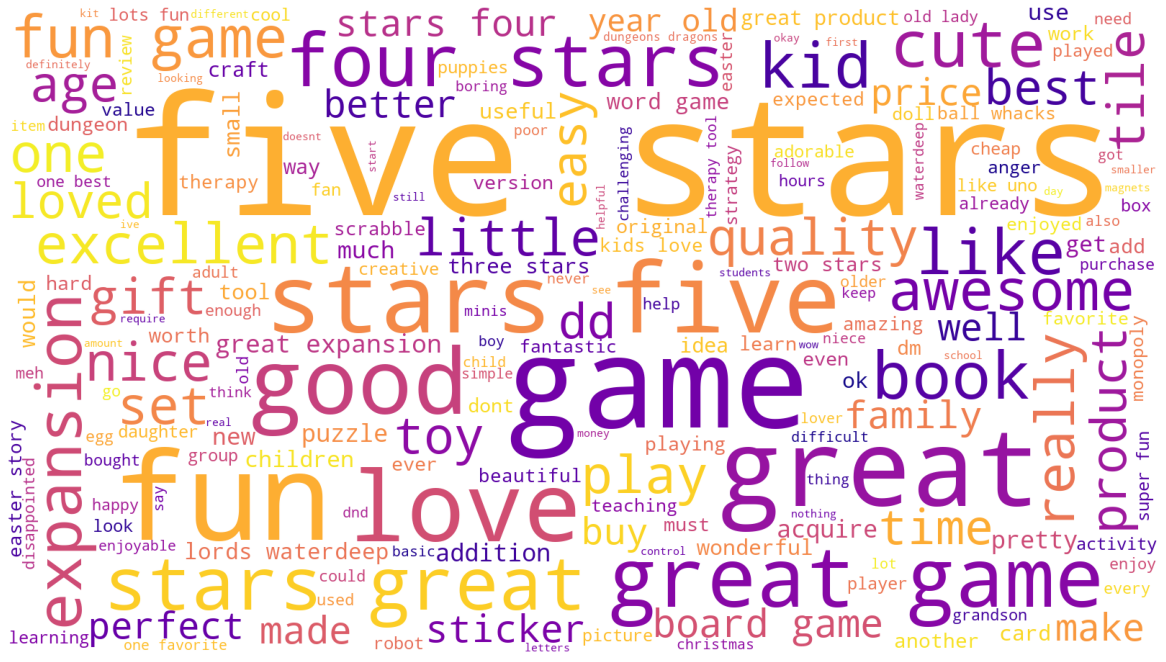

FreqDist({'stars': 427, 'five': 342, 'game': 319, 'great': 295, 'the': 261, 'a': 240, 'for': 232, 'fun': 218, 'to': 192, 'and': 168, ...})

In [99]:
# Plot the wordcloud Image.
plt.figure(figsize = (16, 9), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

fdist1 = FreqDist(tokens_2)
fdist

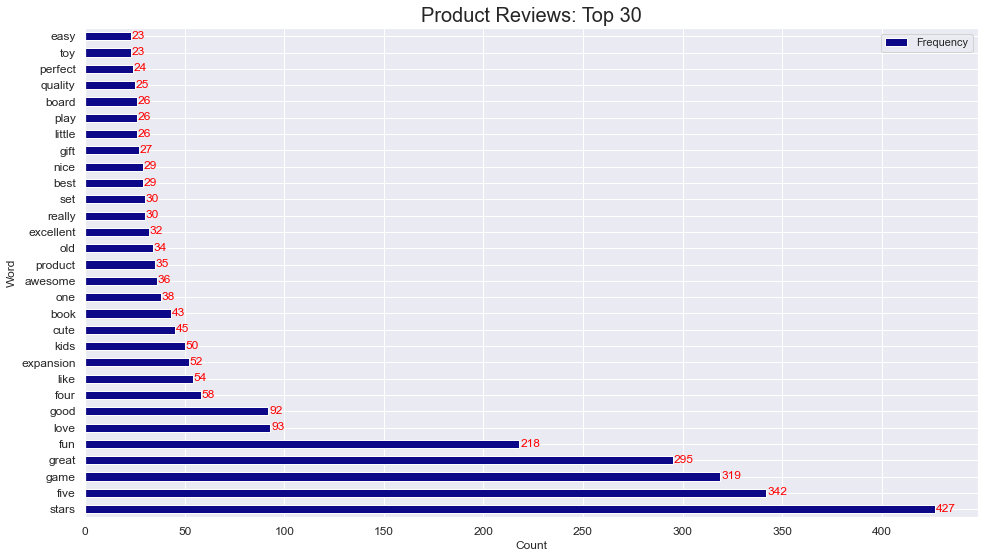

In [100]:
# Identifying 30 most common words and polarity
counts = pd.DataFrame(Counter(tokens_2).most_common(30),
                      columns=['Word', 'Frequency']).set_index('Word')

ax = counts.plot(kind='barh', figsize=(16, 9), fontsize=12, colormap='plasma')
ax.set_xlabel("Count", fontsize=12)
ax.set_ylabel("Word", fontsize=12)
ax.set_title("Product Reviews: Top 30", fontsize=20)
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

### Sentiment Polarity

In [101]:
# Sentiment Polarity Analysis
# Install TextBlob.
!pip install textblob

# Import the necessary package.
from textblob import TextBlob

# Define a function to extract a polarity score for the comment.
def generate_polarity(comment):
    return TextBlob(comment).sentiment[0]

# Populate a new column with polarity scores for each comment.
df4_copy['polarity_review'] = df4_copy['review'].apply(generate_polarity)
df4_copy['polarity_summary'] = df4_copy['summary'].apply(generate_polarity)

# Preview the result.
df4_copy.head()

,index,review,summary,tokens_review,tokens_summary,polarity_review,polarity_summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was...",-0.036111,0.15
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,...",0.035952,-0.80
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]",0.116640,0.00
3,3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]",0.578788,0.00
4,4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]",-0.316667,0.00


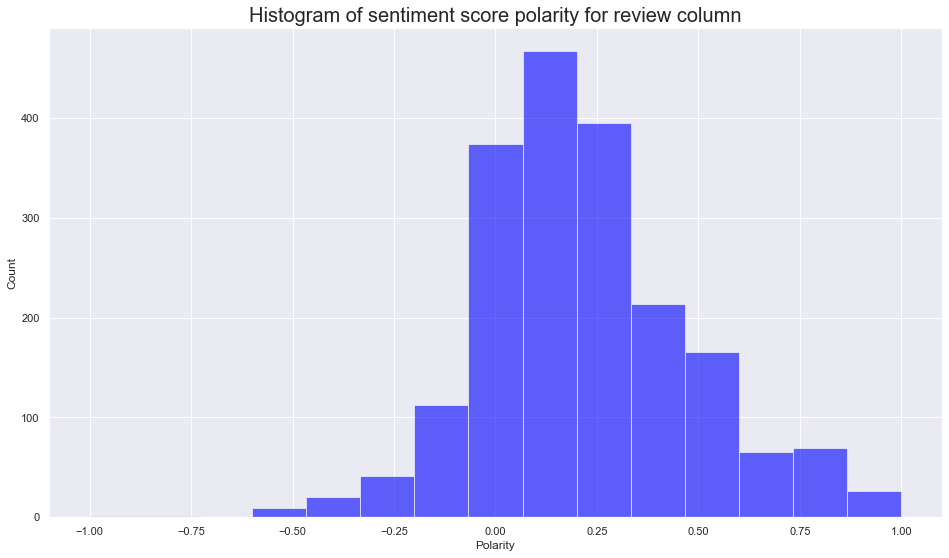

In [102]:
#Visualising using a histogram for the review column.

# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df4_copy['polarity_review'], num_bins, facecolor='blue', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity for review column', fontsize=20)

plt.show()

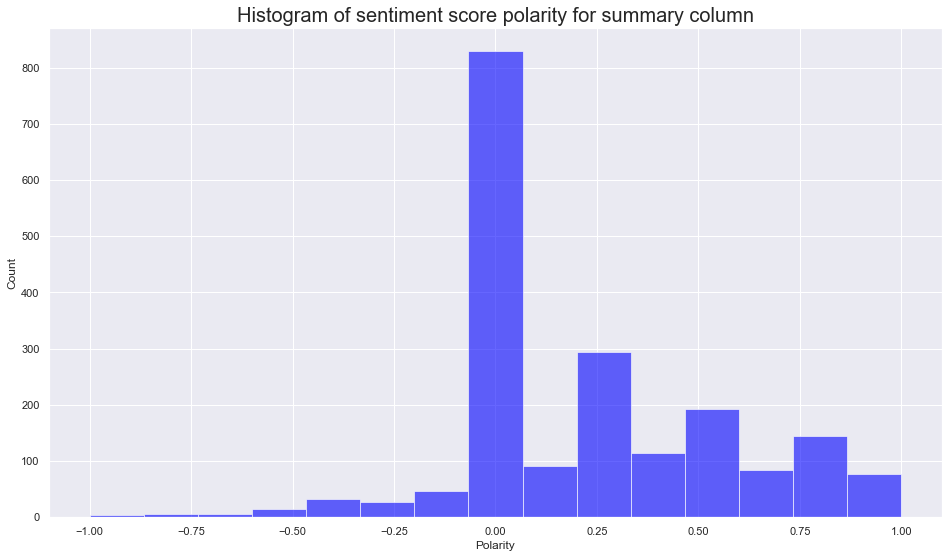

In [103]:
#Visualising using a histogram for the summary column.

# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df4_copy['polarity_summary'], num_bins, facecolor='blue', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity for summary column', fontsize=20)

plt.show()

### Top 20 positive and negative reviews and summaries.

In [104]:
#Top 20 positive Reviews

positive_sentiment_review = df4_copy.nlargest(20, 'polarity_review')
positive_sentiment_review_tab = positive_sentiment_review[['review', 'polarity_review']]
positive_sentiment_review_tab.style.set_properties(subset=['review'], **{'width': '1200px'})

# View output.
print(positive_sentiment_review_tab)

                                                 review  polarity_review
7                             came in perfect condition              1.0
164                                        awesome book              1.0
193                                        awesome gift              1.0
489   excellent activity for teaching selfmanagement...              1.0
517                         perfect just what i ordered              1.0
583                                   wonderful product              1.0
601                                  delightful product              1.0
613   wonderful for my grandson to learn the resurre...              1.0
782                                             perfect              1.0
923                                             awesome              1.0
1119                                        awesome set              1.0
1150               best set buy 2 if you have the means              1.0
1159               awesome addition to my rpg gm sy

In [105]:
# Top 20 negative reviews.
negative_sentiment_review = df4_copy.nsmallest(20, 'polarity_review')
negative_sentiment_review_tab = negative_sentiment_review[['review', 'polarity_review']]
negative_sentiment_review_tab.style.set_properties(subset=['review'], **{'width': '1200px'})

# View output.
print(negative_sentiment_review_tab)

                                                 review  polarity_review
207   booo unles you are patient know how to measure...        -1.000000
181                   incomplete kit very disappointing        -0.780000
1773  im sorry i just find this product to be boring...        -0.583333
362   one of my staff will be using this game soon s...        -0.550000
116   i bought this as a christmas gift for my grand...        -0.500000
226   this was a gift for my daughter i found it dif...        -0.500000
229                    i found the directions difficult        -0.500000
289              instructions are complicated to follow        -0.500000
300                                           difficult        -0.500000
1501                         expensive for what you get        -0.500000
173   i sent this product to my granddaughter the po...        -0.491667
345   my 8 yearold granddaughter and i were very fru...        -0.446250
531   i purchased this on the recommendation of two

In [106]:
# Top 20 positive summaries.
positive_sentiment_summary = df4_copy.nlargest(20, 'polarity_summary')
positive_sentiment_summary_tab = positive_sentiment_summary[['summary', 'polarity_summary']]
positive_sentiment_summary_tab.style.set_properties(subset=['summary'], **{'width': '1200px'})

# View output.
print(positive_sentiment_summary_tab)

                                               summary  polarity_summary
6                                  best gm screen ever               1.0
28                                   wonderful designs               1.0
32                                             perfect               1.0
80   theyre the perfect size to keep in the car or ...               1.0
133                            perfect for preschooler               1.0
139             awesome sticker activity for the price               1.0
160                                       awesome book               1.0
162                    he was very happy with his gift               1.0
186                                            awesome               1.0
209           awesome and welldesigned for 9 year olds               1.0
412                                            perfect               1.0
468                                          excellent               1.0
536                                          excell

In [107]:
# Top 20 negative summaries.
negative_sentiment_summary = df4_copy.nsmallest(20, 'polarity_summary')
negative_sentiment_summary_tab = negative_sentiment_summary[['summary', 'polarity_summary']]
negative_sentiment_summary_tab.style.set_properties(subset=['summary'], **{'width': '1200px'})

# View output.
print(negative_sentiment_summary_tab)

                                                summary  polarity_summary
21                        the worst value ive ever seen         -1.000000
207    boring unless you are a craft person which i am          -1.000000
819                                              boring         -1.000000
1148  before this i hated running any rpg campaign d...         -0.900000
1     another worthless dungeon masters screen from ...         -0.800000
143                                        disappointed         -0.750000
623                                        disappointed         -0.750000
785                                        disappointed         -0.750000
1591                                       disappointed         -0.750000
361   promotes anger instead of teaching calming met...         -0.700000
875            too bad this is not what i was expecting         -0.700000
880                        bad qualityall made of paper         -0.700000
177     at age 31 i found these very d